In [3]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import osmnx as ox
import pandas as pd
import seaborn as sns

In [4]:
# Load the data
df = pd.read_pickle('data_mdc/mdc.pkl')

# Swap latitude and longitude because they are the wrong way round
tmp = df['latitude'].copy()
df['latitude'] = df['longitude']
df['longitude'] = tmp

In [3]:
df.head()

latitude  longitude  time_zone type
user time                                                     
5448 2009-10-31 15:55:40  46.520321   6.632476      -7200  gps
     2009-10-31 16:34:37  46.523943   6.592562      -7200  gps
     2009-10-31 16:34:46  46.524187   6.594179      -7200  gps
     2009-10-31 16:34:46  46.524187   6.594179      -7200  gps
     2009-10-31 16:34:57  46.523909   6.596068      -7200  gps

In [3]:
df_abboip = df.loc[5448]

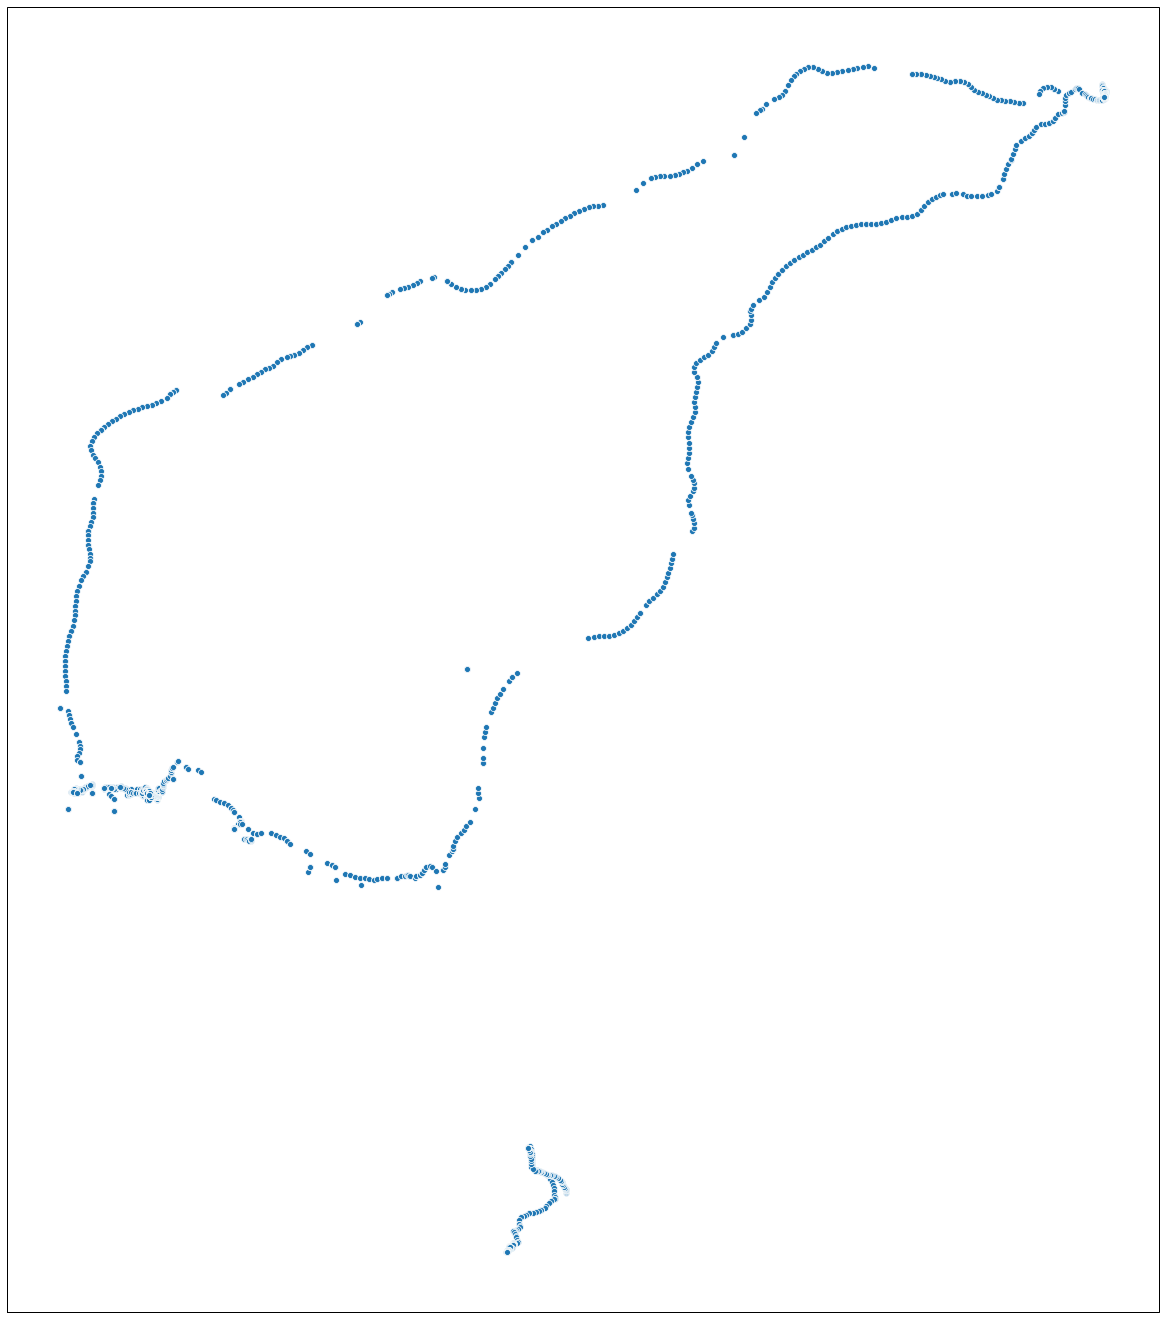

In [5]:
plt.figure(figsize=(24, 24))

ax = plt.axes(projection=ccrs.UTM(32))
#ax.set_extent([west, east, south, north])

sns.scatterplot(df_abboip['longitude'], df_abboip['latitude'], transform=ccrs.PlateCarree())

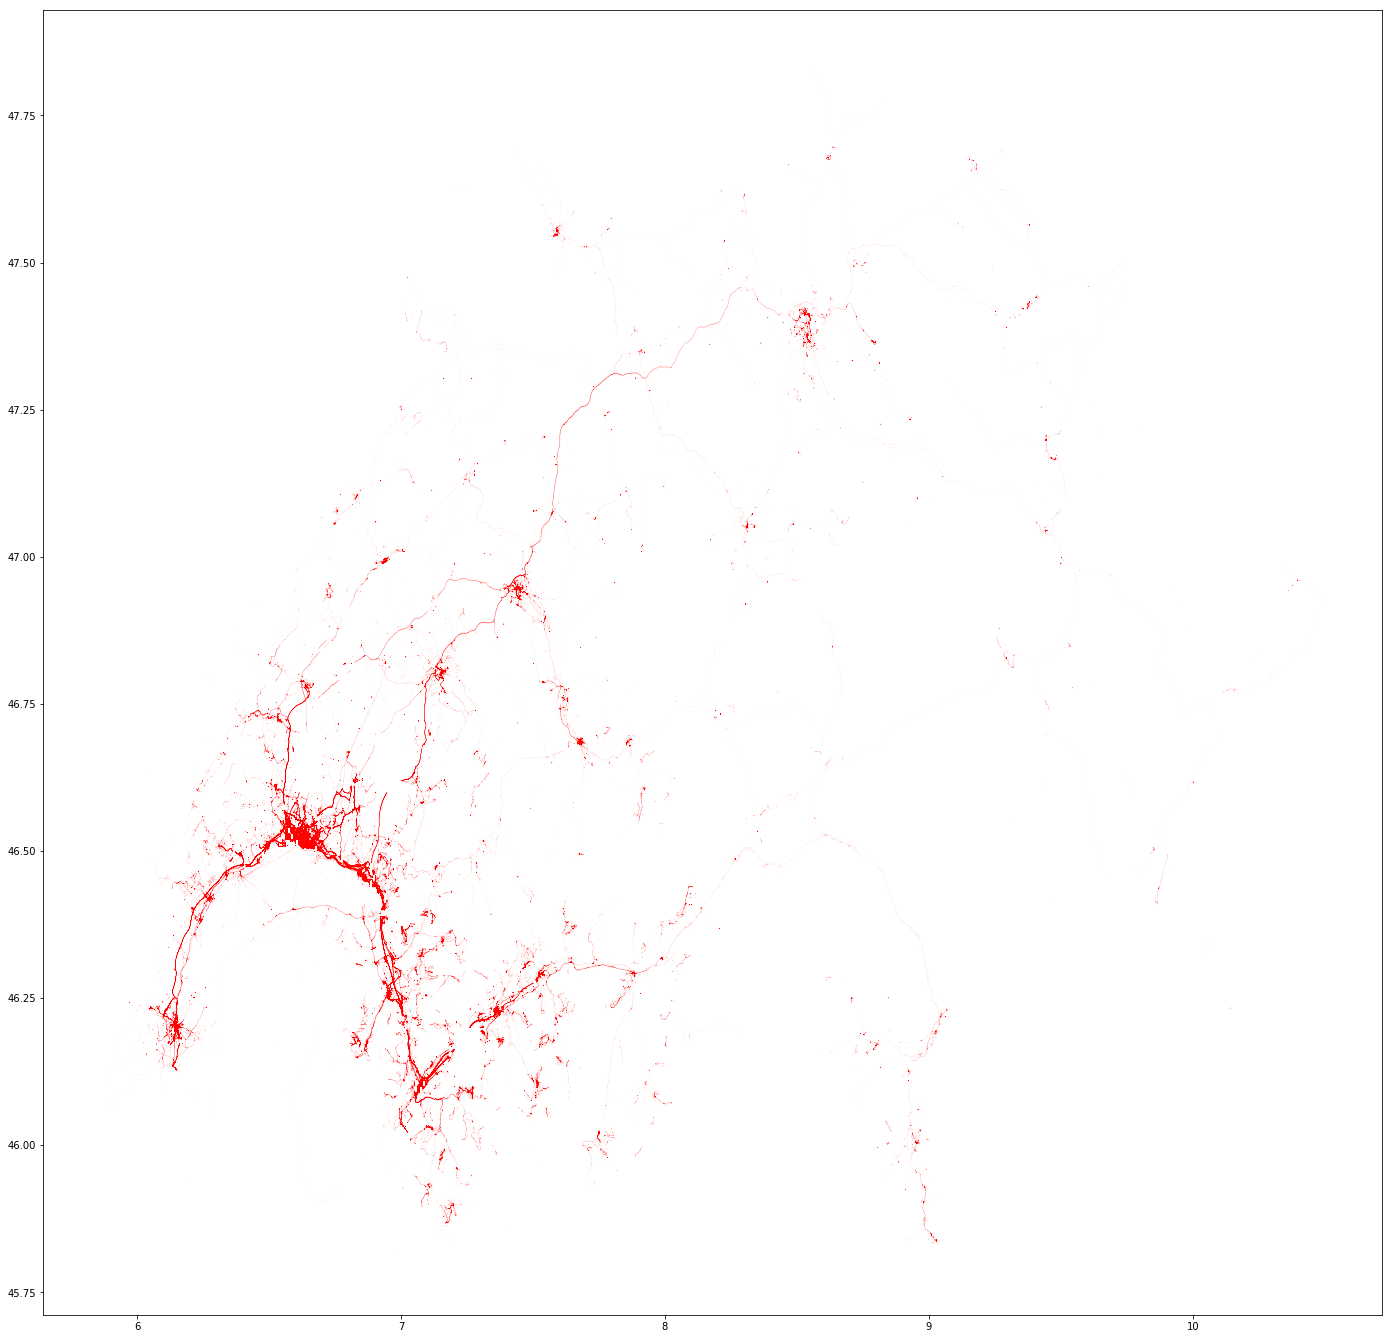

In [7]:
plt.figure(figsize=(24, 24))
plt.scatter(df['longitude'], df['latitude'], c='#ff0000', s=0.25, alpha=0.005)
plt.show()

In [3]:
# Load the small OSMNX graph of Lausanne
streets_lausanne = ox.load_graphml('lausanne_streets_all.graphml', folder='osmnx_data')

In [4]:
ls_edges = ox.graph_to_gdfs(streets_lausanne, nodes=False, fill_edge_geometry=True)
ls_west, ls_south, ls_east, ls_north = ls_edges.total_bounds
print(ls_west, ls_south, ls_east, ls_north)

6.584488 46.5045266 6.72017 46.6020203


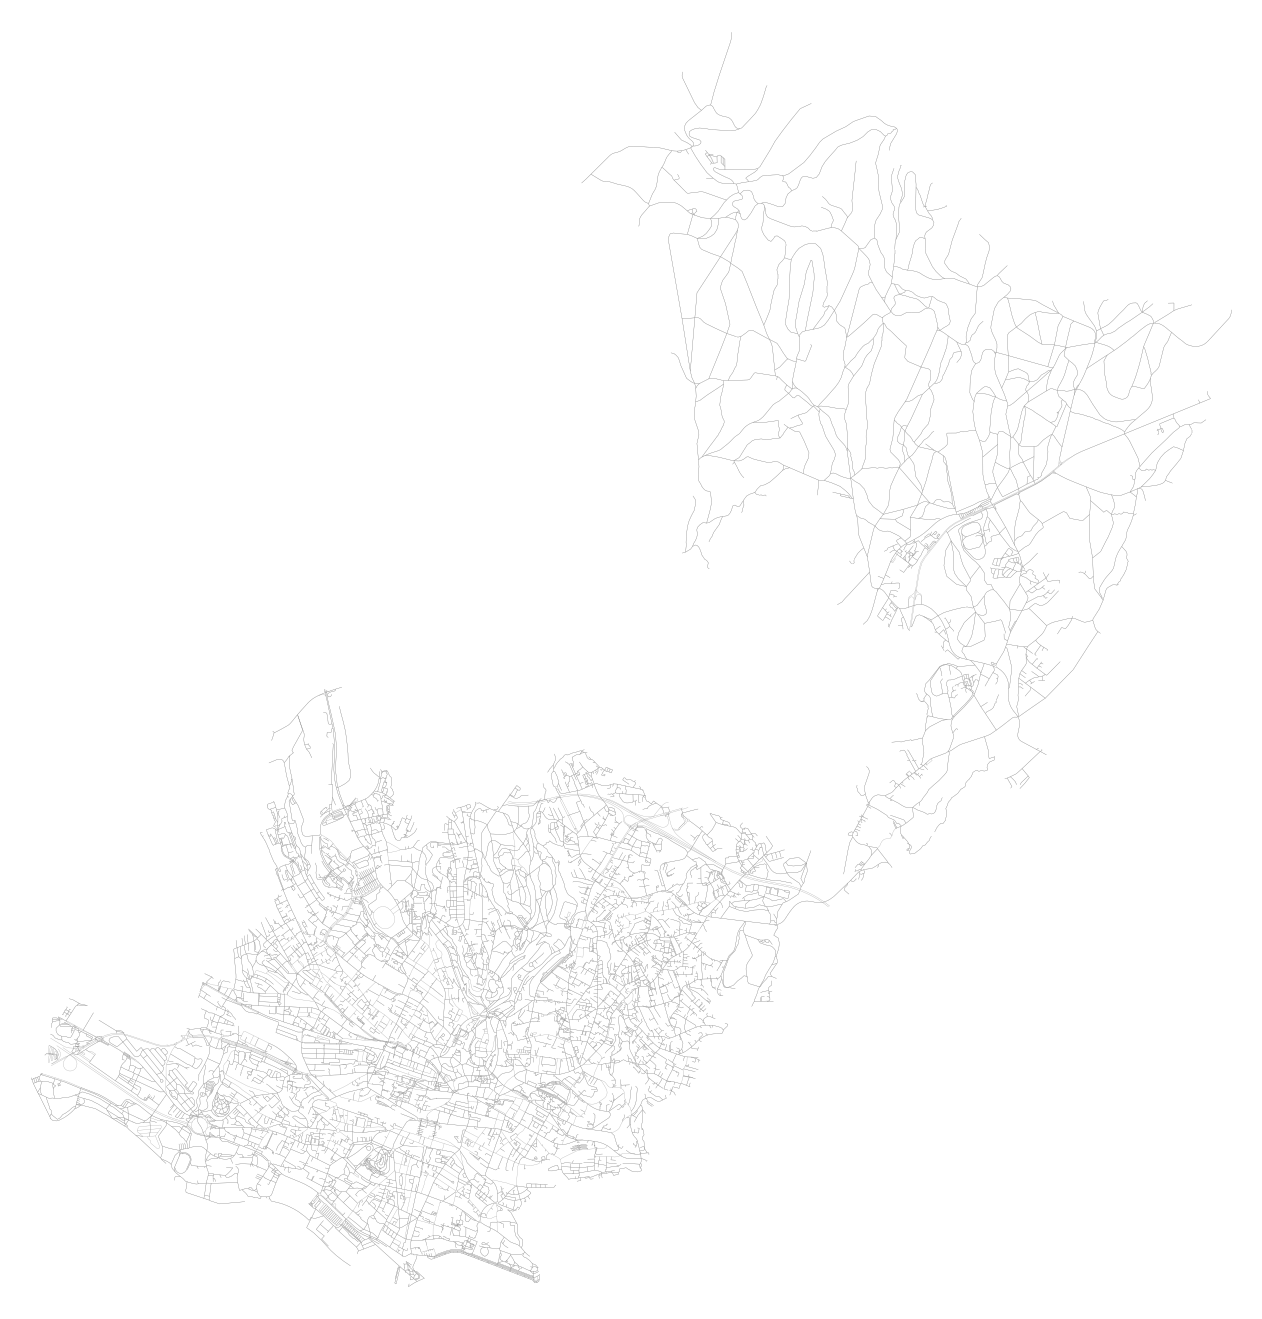

(<Figure size 2404.86x1728 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x184fd3828>)

In [8]:
ox.plot_graph(streets_lausanne, fig_height=24, node_size=0, edge_linewidth=0.25)

In [5]:
# Load the small OSMNX graph of Geneva
streets_geneva = ox.load_graphml('geneva_streets_all.graphml', folder='osmnx_data')

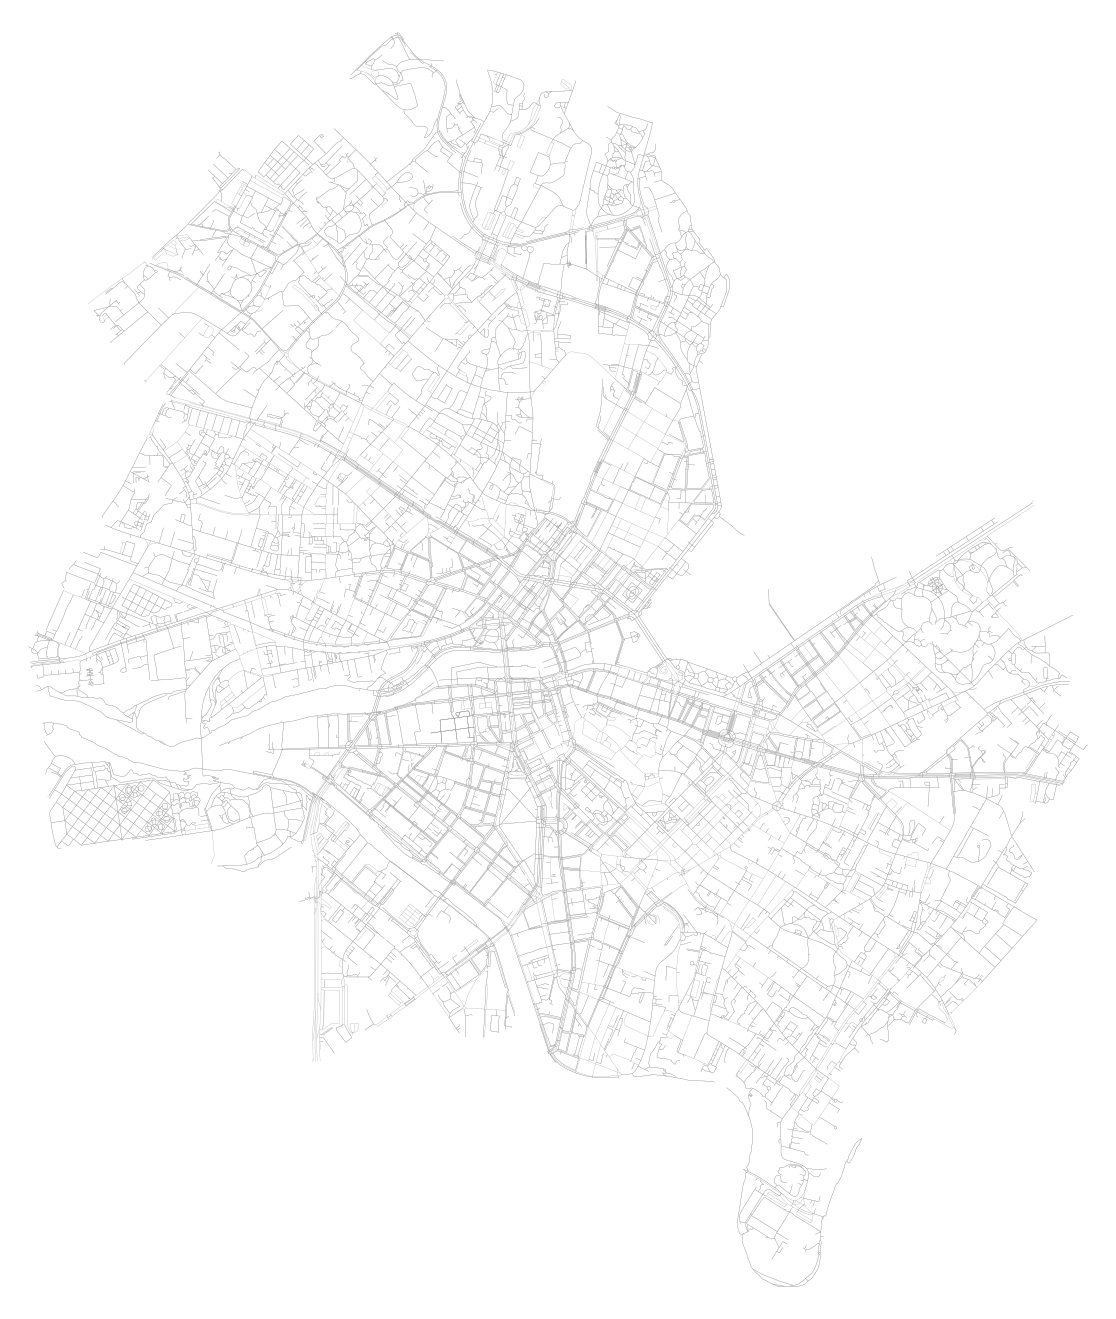

(<Figure size 2109.2x1728 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x122f247f0>)

In [10]:
ox.plot_graph(streets_geneva, fig_height=24, node_size=0, edge_linewidth=0.25)

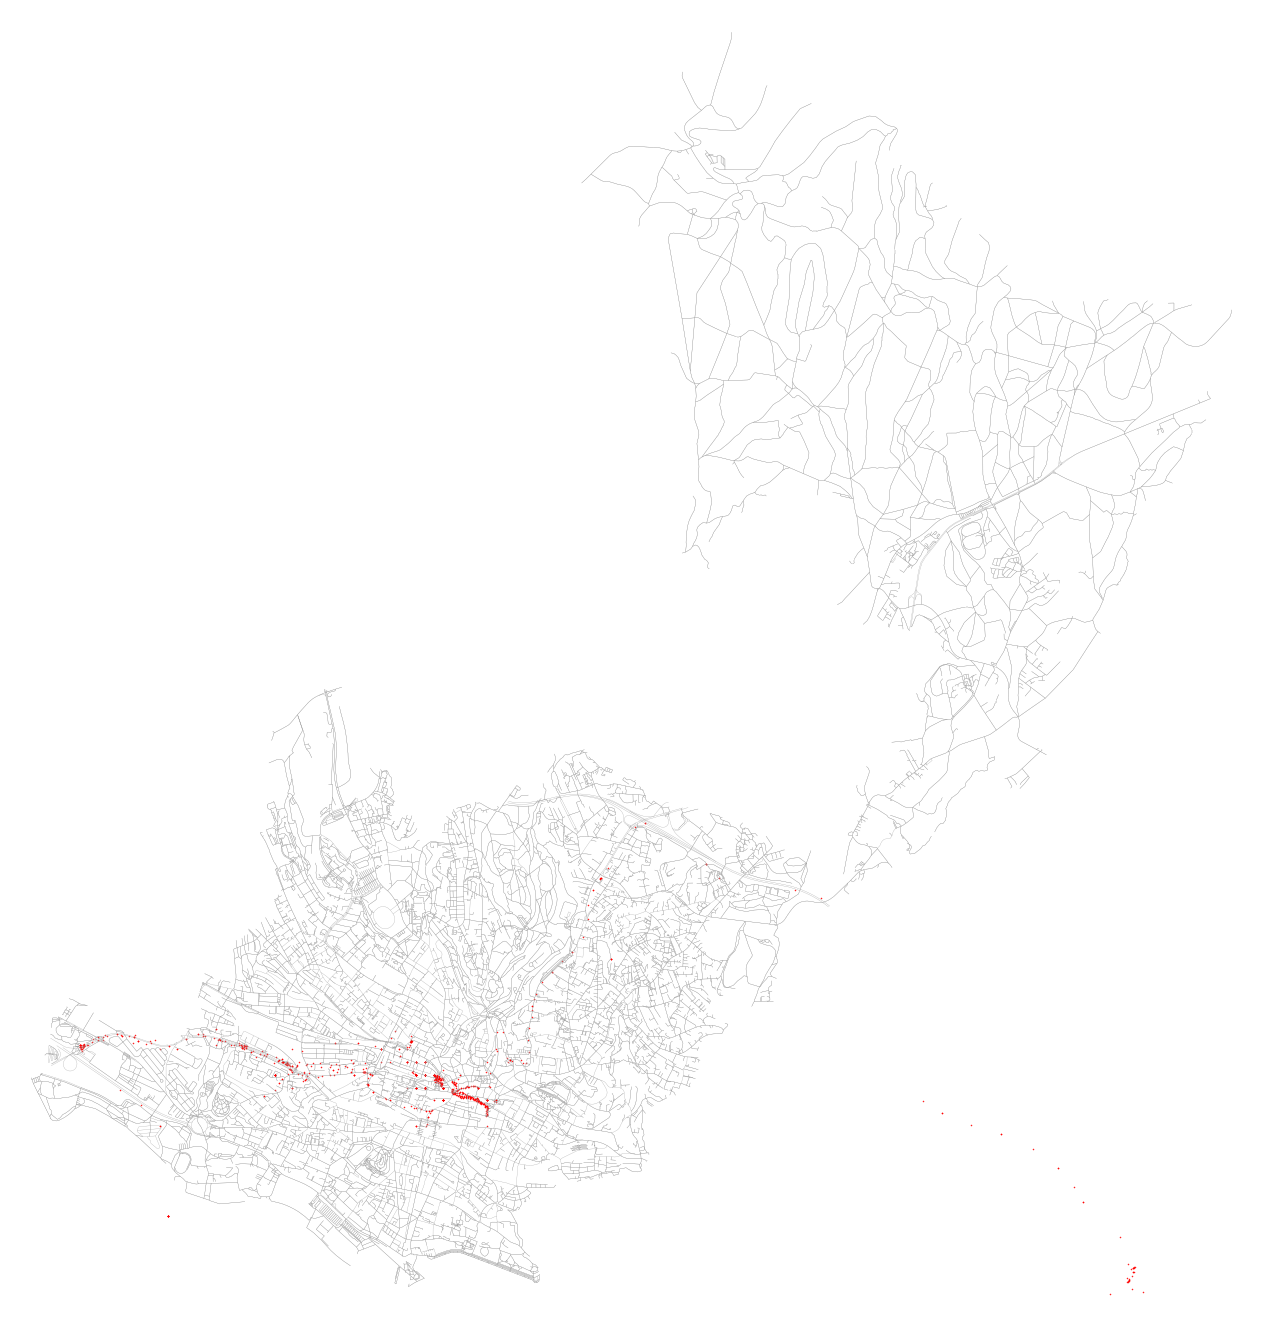

In [12]:
fig, ax = ox.plot_graph(streets_lausanne, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(df_abboip['longitude'], df_abboip['latitude'], c='#ff0000', s=0.25, alpha=1.0)

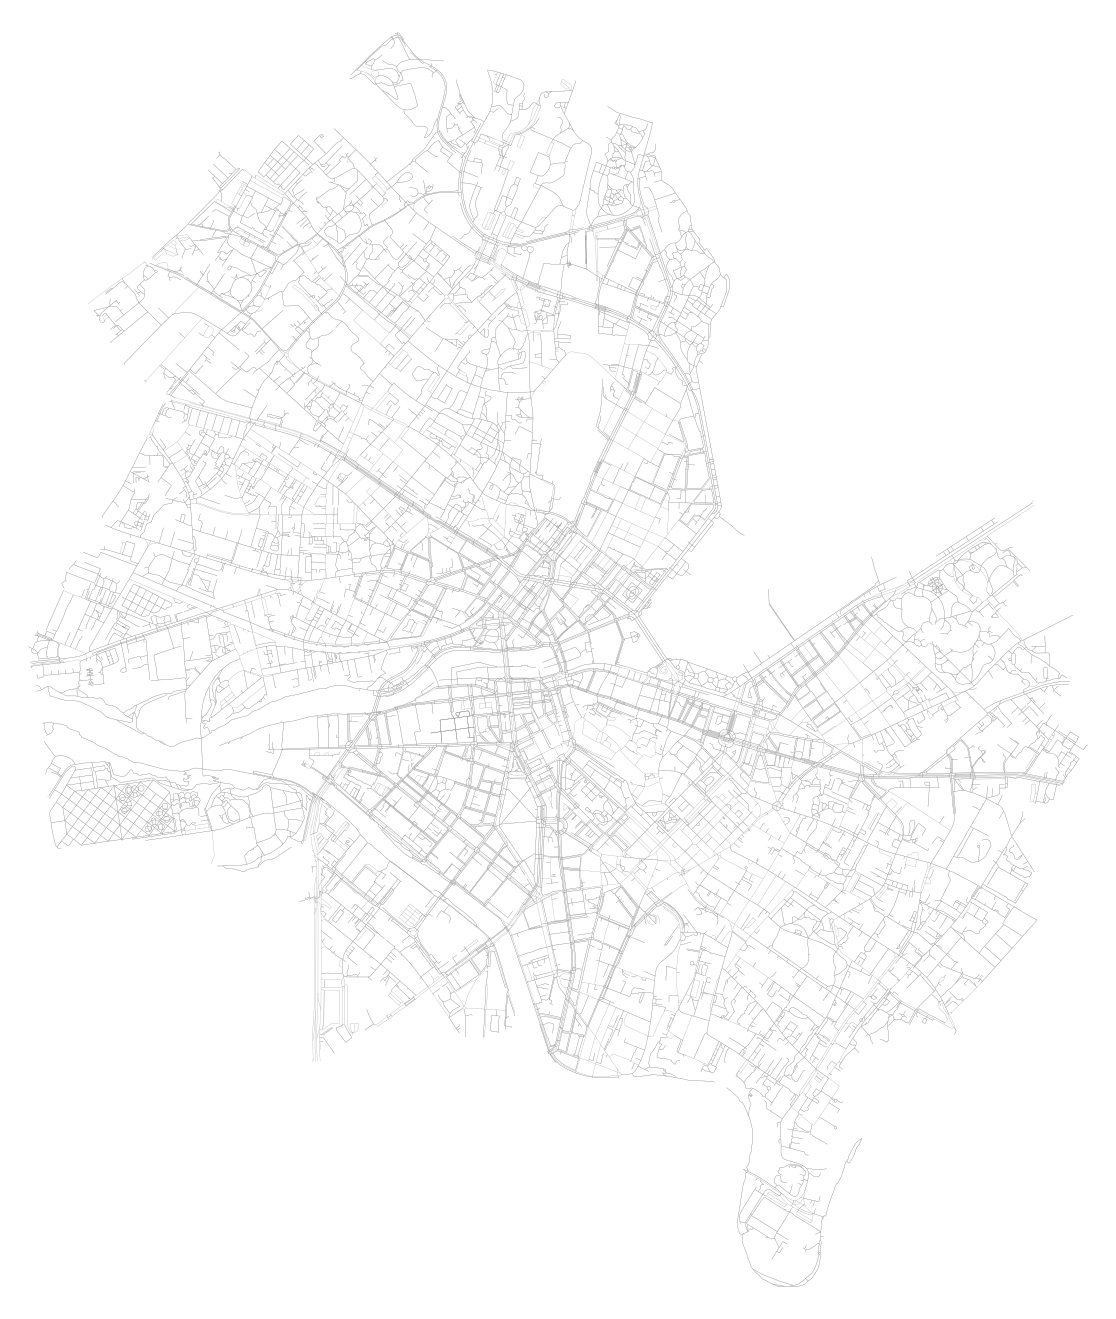

In [14]:
fig, ax = ox.plot_graph(streets_geneva, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(df_abboip['longitude'], df_abboip['latitude'], c='#ff0000', s=0.25, alpha=1.0)

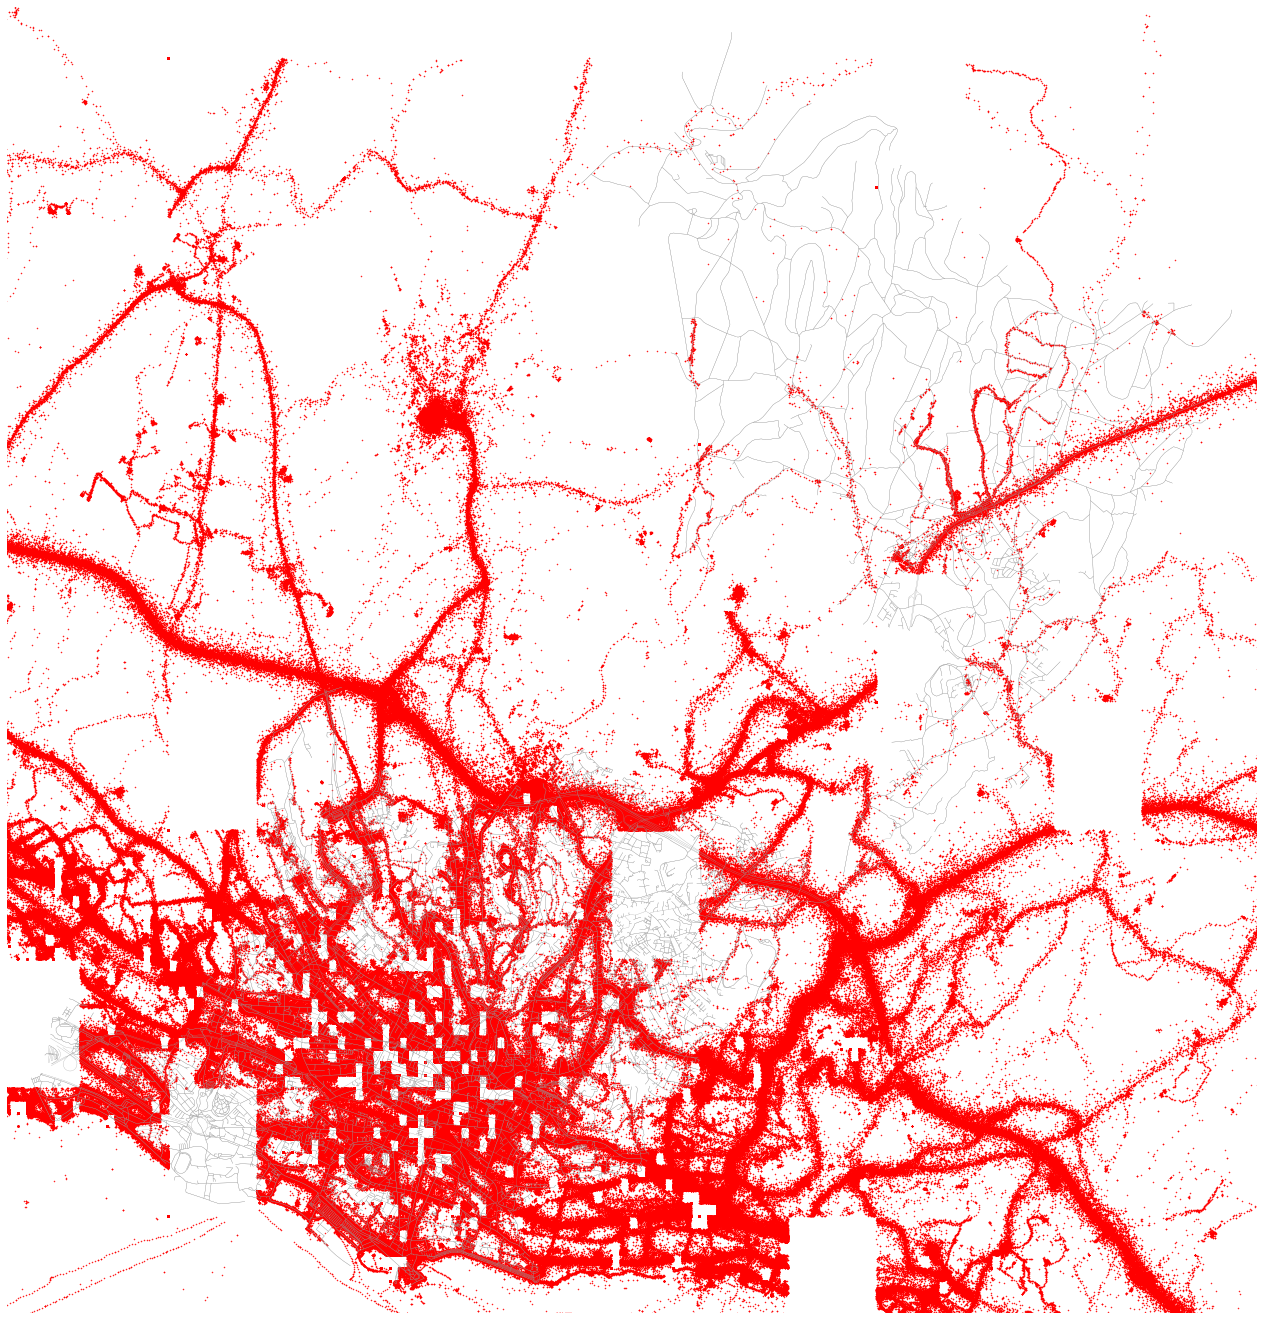

In [15]:
fig, ax = ox.plot_graph(streets_lausanne, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(df['longitude'], df['latitude'], c='#ff0000', s=0.25, alpha=1.0)

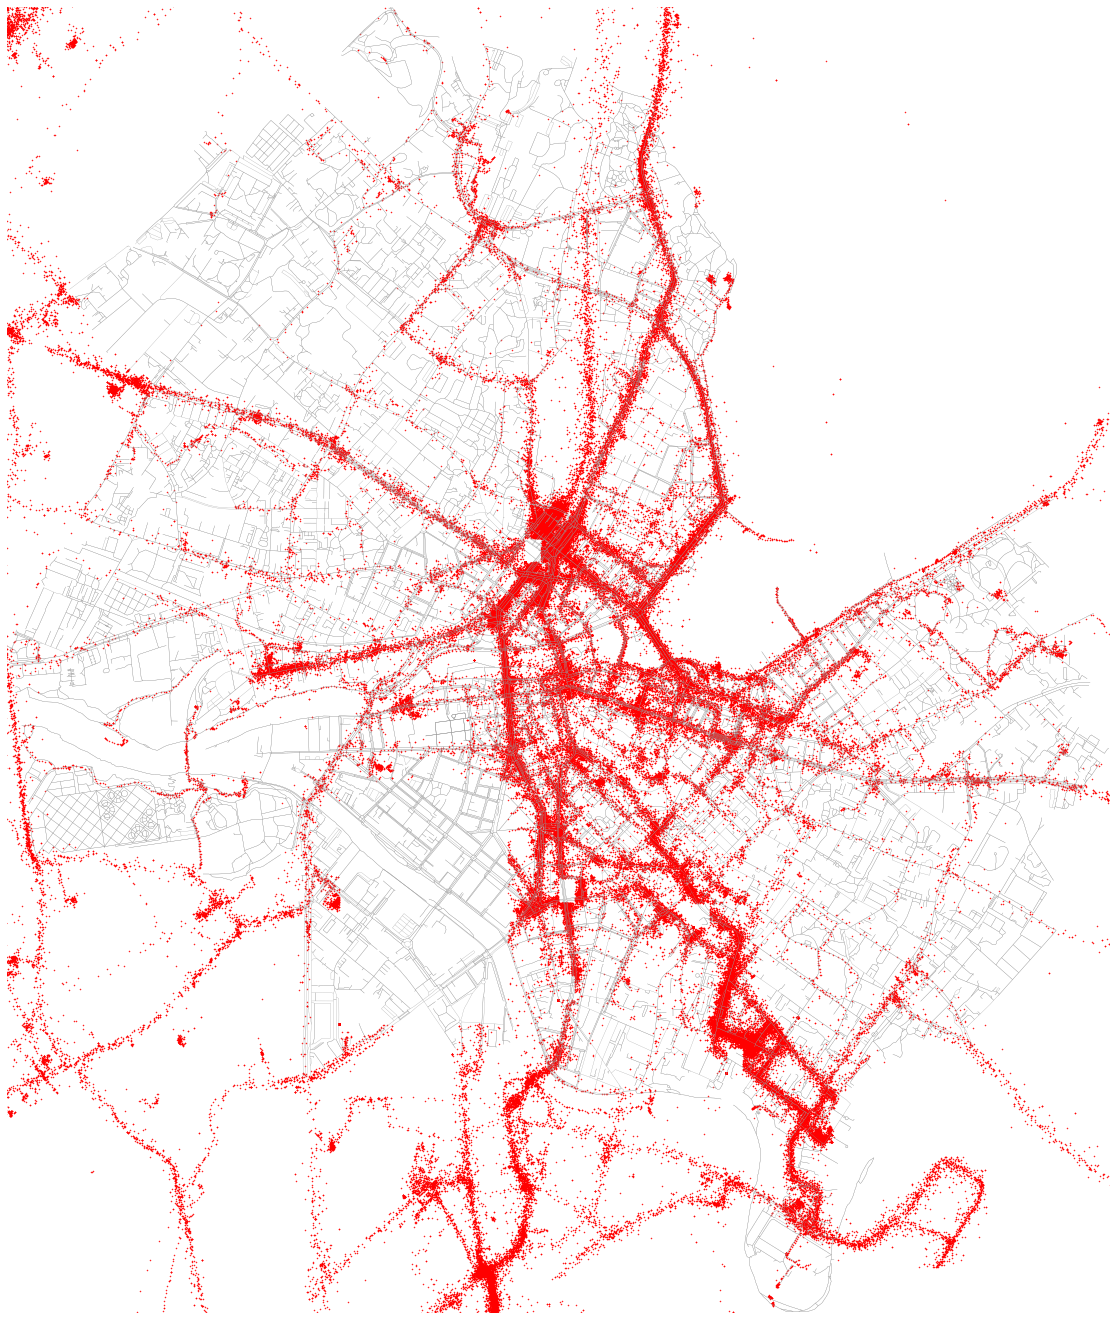

In [6]:
fig, ax = ox.plot_graph(streets_geneva, fig_height=24, node_size=0, edge_linewidth=0.25, margin=0.0,
                        show=False, close=False)
ax.scatter(df['longitude'], df['latitude'], c='#ff0000', s=0.25, alpha=1.0)

plt.savefig('../Images/overview_mdc_geneva.png', dpi=100, bbox_inches='tight')

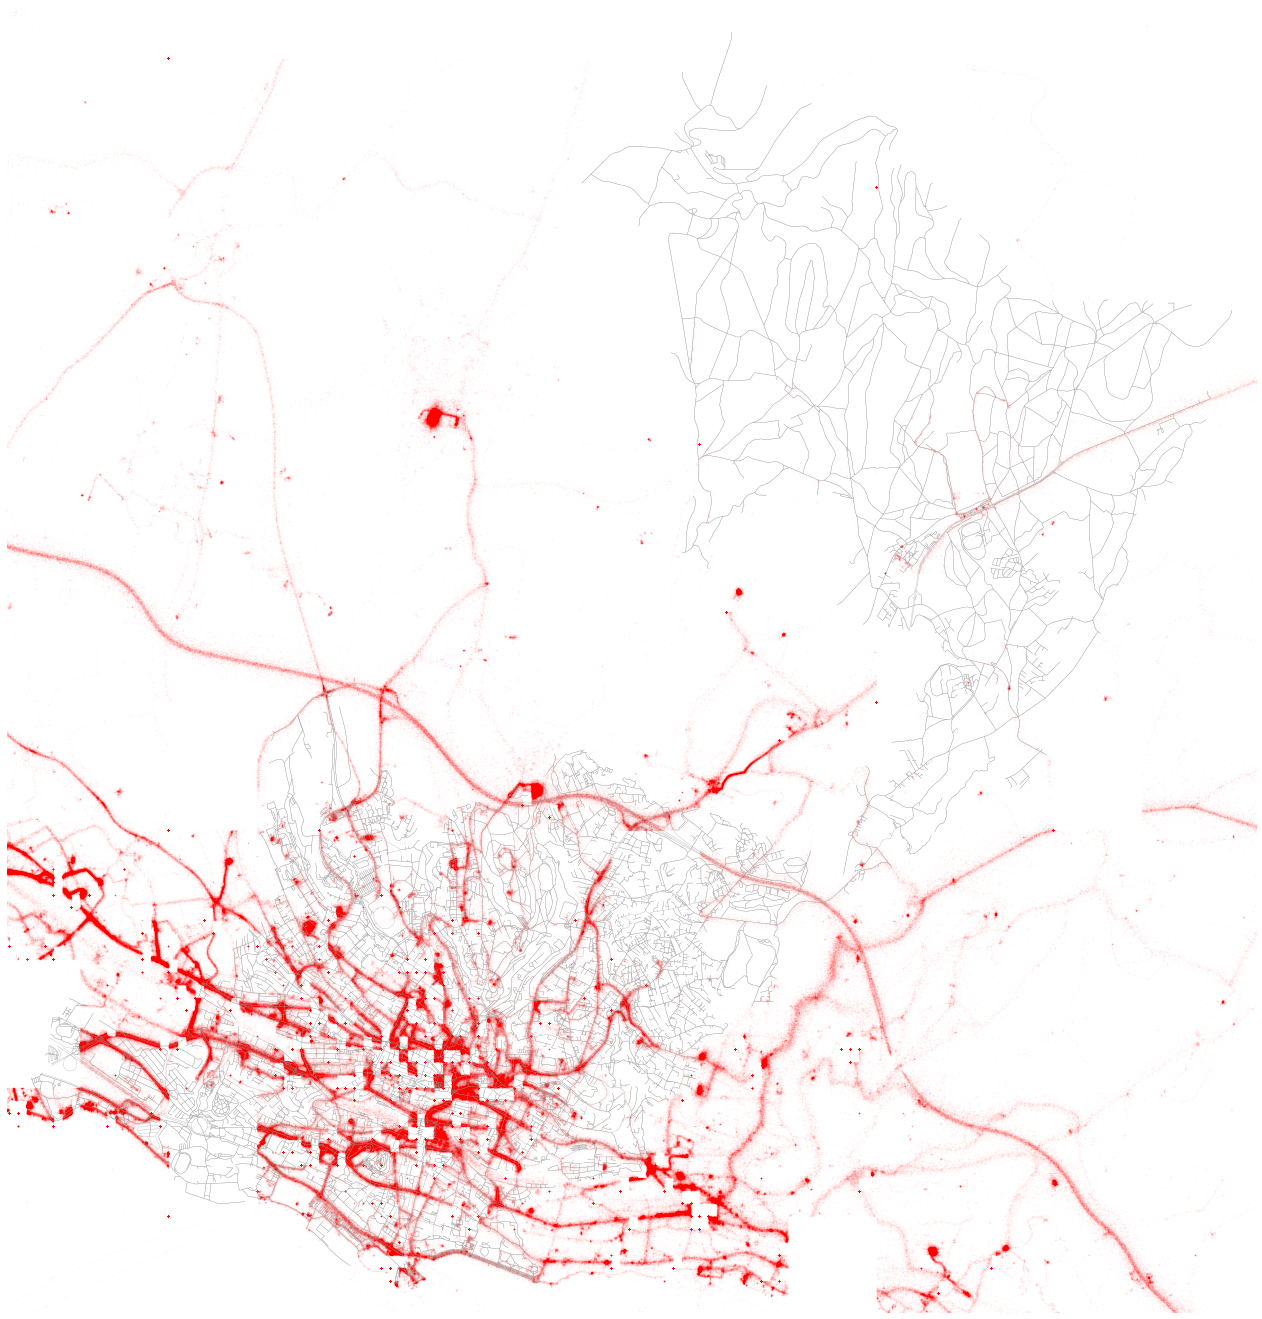

In [11]:
fig, ax = ox.plot_graph(streets_lausanne, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(df['longitude'], df['latitude'], c='#ff0000', s=0.25, alpha=0.02)

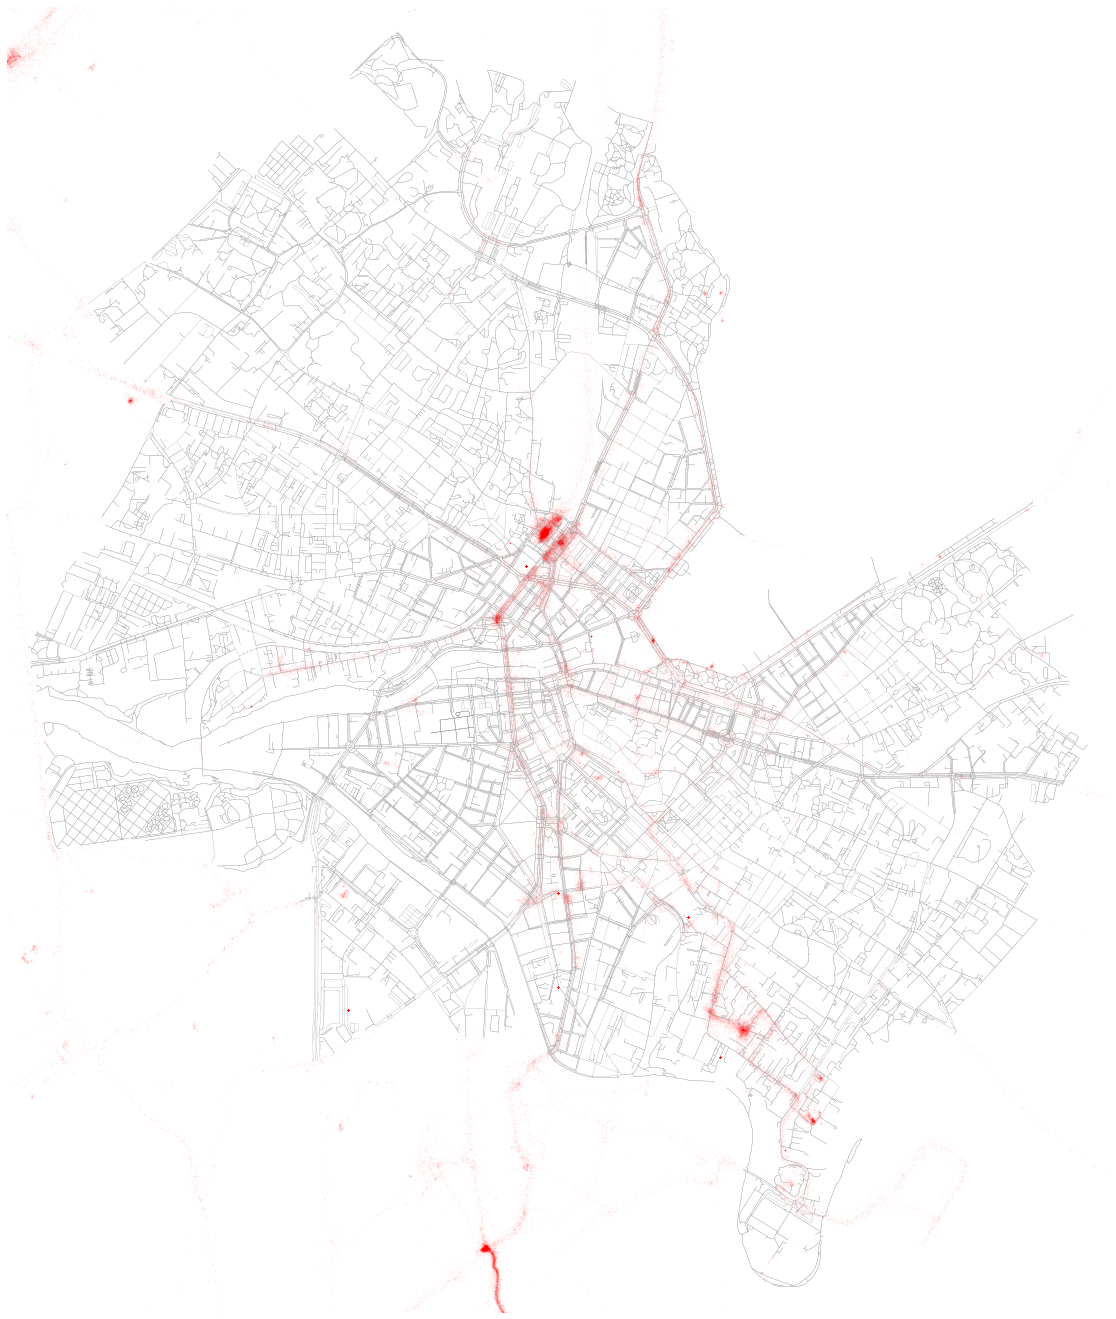

In [12]:
fig, ax = ox.plot_graph(streets_geneva, fig_height=24, node_size=0, edge_linewidth=0.25, show=False, close=False)
ax.scatter(df['longitude'], df['latitude'], c='#ff0000', s=0.25, alpha=0.02)